# Integrate with SnapATAC

Combine clusters and other metadata from previous SnapATAC runs into ArchR.

In [2]:
library(ArchR)
library(patchwork)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [3]:
set.seed(1)
addArchRThreads(threads = 32) 

Setting default number of Parallel threads to 32.



In [4]:
addArchRGenome("hg38")

Setting default genome to Hg38.



In [5]:
ArrowFiles = c('D0.arrow',
               'D2.arrow',
               'D4.arrow',
               'D6.arrow',
               'D8.arrow',
               'D10.arrow',
               'D12.arrow',
               'D14.arrow')
#              'H1.arrow')

In [6]:
proj <- ArchRProject(
  ArrowFiles = paste("/srv/scratch/surag/scATAC-reprog/arrow/", ArrowFiles, sep=''), 
  outputDirectory = "/srv/scratch/surag/scATAC-reprog/arrow/without_iPSC_snapATAC_integrate",
  copyArrows = FALSE #This is recommened so that you maintain an unaltered copy for later usage.
)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...



Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,-

In [73]:
metadata = read.table("../20200206_pmat_snapATAC/sessions/20200220_n74838/metadata.tsv", header=T)
rownames(metadata) = sub("_", "#", rownames(metadata))
metadata = metadata[rownames(metadata) %in% proj$cellNames, ]
head(metadata)
dim(metadata)

,sample,umap.1,umap.2,cluster
,<fct>,<dbl>,<dbl>,<int>
D0#AAACAACGACGATTAC,D0,6.545686,-7.701751,2
D0#AAACAACGACTCACGG,D0,5.180663,-7.633298,2
D0#AAACAACGAGCGCACT,D0,6.080648,-8.114705,2
D0#AAACAACGATGGAACG,D0,3.584474,-7.276754,1
D0#AAACACGCTACGCCAC,D0,5.299551,-8.133782,2
D0#AAACACGCTAGACTTC,D0,6.744747,-7.763450,2


[1] 71994     4

In [74]:
# replace clusters with fine clusters
fine_clusters = read.table("../20200206_pmat_snapATAC/sessions/20200220_n74838/fine_clusters.tsv", header=T)
rownames(fine_clusters) = sub("_", "#", fine_clusters$sample_barcode)
head(fine_clusters)

metadata$cluster = fine_clusters[rownames(metadata), "clusters"]
head(metadata)

,sample_barcode,clusters
,<fct>,<int>
D0#AAACAACGACGATTAC,D0_AAACAACGACGATTAC,1
D0#AAACAACGACTCACGG,D0_AAACAACGACTCACGG,18
D0#AAACAACGAGCGCACT,D0_AAACAACGAGCGCACT,14
D0#AAACAACGATGGAACG,D0_AAACAACGATGGAACG,18
D0#AAACACGCTACGCCAC,D0_AAACACGCTACGCCAC,14
D0#AAACACGCTAGACTTC,D0_AAACACGCTAGACTTC,14


,sample,umap.1,umap.2,cluster
,<fct>,<dbl>,<dbl>,<int>
D0#AAACAACGACGATTAC,D0,6.545686,-7.701751,1
D0#AAACAACGACTCACGG,D0,5.180663,-7.633298,18
D0#AAACAACGAGCGCACT,D0,6.080648,-8.114705,14
D0#AAACAACGATGGAACG,D0,3.584474,-7.276754,18
D0#AAACACGCTACGCCAC,D0,5.299551,-8.133782,14
D0#AAACACGCTAGACTTC,D0,6.744747,-7.763450,14


In [54]:
# if there's no Cluster 5 ArchR makes Cluster 6 Cluster 5 and so on
# so swap the last cluster (18) and make it 5 (if using old labels)
# metadata[metadata$cluster==18, "cluster"] = 5

In [75]:
# subset to files with metadata
proj = proj[rownames(metadata), ]

In [ ]:
proj <- addIterativeLSI(ArchRProj = proj, iterations = 2, force=T, useMatrix = "TileMatrix", name = "IterativeLSI")

In [76]:
# using clusters from SnapATAC
proj$Clusters = paste("C", metadata$cluster, sep='')

In [68]:
proj <- addUMAP(ArchRProj = proj, reducedDims = "IterativeLSI", force=T)

17:33:13 UMAP embedding parameters a = 0.7669 b = 1.223

17:33:13 Read 71994 rows and found 30 numeric columns

17:33:13 Using Annoy for neighbor search, n_neighbors = 40

17:33:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

17:33:29 Writing NN index file to temp file /tmp/Rtmp2DsElJ/file4f5f70cb311a

17:33:29 Searching Annoy index using 28 threads, search_k = 4000

17:33:31 Annoy recall = 100%

17:33:33 Commencing smooth kNN distance calibration using 28 threads

17:33:40 Initializing from normalized Laplacian + noise

17:33:48 Commencing optimization for 200 epochs, with 4676560 positive edges

17:34:52 Optimization finished



In [ ]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Sample", embedding = "UMAP")

In [77]:
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4f5f511867f5-Date-2020-04-29_Time-17-36-55.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
ggrastr is not available for rastr of points, continuing without rastr!

To install ggrastr try : devtools::install_github('VPetukhov/ggrastr')

Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4f5f511867f5-Date-2020-04-29_Time-17-36-55.log



Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `col

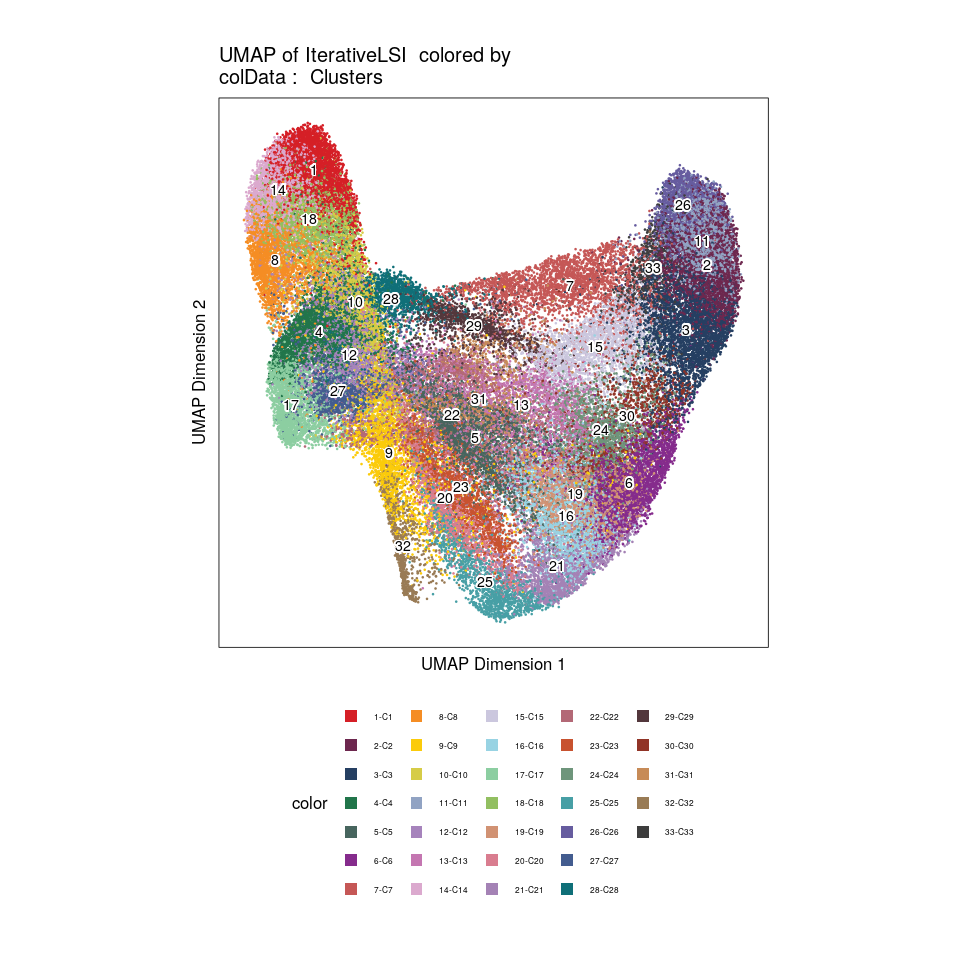

In [78]:
options(repr.plot.width = 8, repr.plot.height = 8)

p2

In [148]:
proj <- addImputeWeights(proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-4f5f666ef431-Date-2020-04-29_Time-18-43-11.log
If there is an issue, please report to github with logFile!

2020-04-29 18:43:11 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [79]:
markersGS <- getMarkerFeatures(
    ArchRProj = proj, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "Clusters",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-4f5f61a251-Date-2020-04-29_Time-17-37-15.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2020-04-29 17:37:16 : Matching Known Biases, 0.003 mins elapsed.

###########
2020-04-29 17:39:44 : Completed Pairwise Tests, 2.46 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-4f5f61a251-Date-2020-04-29_Time-17-37-15.log



In [80]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.01 & Log2FC >= 1.25")

In [371]:
genes_done = read.table("../../../genes_analysed.txt")
genes_done = as.character(genes_done$V1)

In [507]:
df = data.frame(lfc=assay(markersGS, "Log2FC")$C32,
           fdr=assay(markersGS, "FDR")$C32)
rownames(df) = rowData(markersGS)$name

In [508]:
df = df[(df$lfc>1)&(df$fdr<0.1),]
df = df[!grepl("(MIR|SNOR|LOC|LIN|-AS[1-9]|IT1)", rownames(df)), ]
# df = df[df$fdr<0.1,]

In [505]:
df = df[!rownames(df) %in% genes_done,]

In [509]:
rownames(df)[order(df$fdr)]
# rownames(df)[order(-df$lfc)]

[1] "RXRA"          "GPC1"          "MEGF6"         "PLEC"         
  [5] "ADAMTS2"       "INPP5A"        "PKP1"          "AQP1"         
  [9] "PTP4A3"        "BAIAP2"        "CACNA1I"       "TNK2"         
 [13] "MYO7B"         "LAMA5"         "ITPR3"         "KCNJ12"       
 [17] "AATK"          "ARHGEF1"       "CPLX1"         "AHNAK2"       
 [21] "CD81"          "TSC2"          "MROH5"         "INF2"         
 [25] "CTSD"          "RBFOX3"        "HSPG2"         "DOT1L"        
 [29] "OBSCN"         "TPPP"          "JPH3"          "PPP2R2C"      
 [33] "RTN4R"         "TSPAN32"       "BIN1"          "NPTX1"        
 [37] "MIDN"          "FBRSL1"        "ITPK1"         "PIEZO1"       
 [41] "MAB21L4"       "LYNX1"         "ZNF469"        "IFITM10"      
 [45] "IGSF9B"        "ASCL2"         "GPR37L1"       "HTRA3"        
 [49] "NFATC1"        "ZFPM1"         "PSCA"          "SSPO"         
 [53] "KRT16"         "JRK"           "TP73"          "LY6D"         
 [57] "LIMS2"         "PPP1R16A"      "SLC9A3"        "MICALL2"      
 [61] "EXOC3L4"       "P2RY2"         "LYPD2"         "MYRF"         
 [65] "OSBPL5"        "JAG2"          "FAM83G"        "KLHDC4"       
 [69] "FBXL16"        "ELFN1"         "TECPR1"        "CACNA1H"      
 [73] "PAK4"          "FOXO6"         "ANKMY1"        "TRIM11"       
 [77] "GPR20"         "TRMT61A"       "ULK1"          "GPR17"        
 [81] "NECTIN4"       "PFKL"          "IGF2"          "KIFC3"        
 [85] "TRPM5"         "IL17REL"       "MOB2"          "GATA5"        
 [89] "GPSM1"         "ADAM8"         "AGRN"          "HS3ST6"       
 [93] "DUSP8"         "CTD-3080P12.3" "ABHD16B"       "BRI3"         
 [97] "CSTB"          "GPT"           "PSTPIP1"       "RASGEF1A"     
[101] "MKNK2"         "KLK10"         "ZBTB7A"        "FOSL2"        
[105] "SLC5A10"       "EPHA8"         "INS-IGF2"      "DVL1"         
[109] "KLK1"          "ARHGEF16"      "GDF1"          "BRSK2"        
[113] "INS"           "ADAP1"         "PLXNB2"        "CPAMD8"       
[117] "PRKCZ"         "NUDT14"        "GML"           "SLC22A18"     
[121] "C14orf180"     "FOXH1"         "GPR132"        "TMEM179"      
[125] "DSP"           "CAMK2B"        "PLCH2"         "BTBD2"        
[129] "PLD4"          "ODC1"          "CCDC197"       "SPNS2"        
[133] "CHST1"         "LPCAT1"        "PTGDS"         "CRTC1"        
[137] "AKT1"          "DBN1"          "KIF1A"         "EPS8L2"       
[141] "CSNK1G2"       "PALM"          "SDF4"          "CDSN"         
[145] "PLXNA1"        "C6orf132"      "TNFRSF25"      "ADGRB1"       
[149] "PIP5K1C"       "SCRIB"         "KLHL30"        "HBA1"         
[153] "KCNH2"         "BEGAIN"        "HBA2"          "KRT14"        
[157] "SCNN1D"        "POLD4"         "CSPG4"         "SNED1"        
[161] "MUC2"          "RALGDS"        "SLC12A7"       "GPR78"        
[165] "TBC1D9B"       "NOL4L-DT"      "MYO1C"         "TNXB"         
[169] "OPLAH"         "TCF3"          "WNT9A"         "GAS6"         
[173] "EGFL7"         "TLX1NB"        "CERS1"         "ANKRD62"      
[177] "SH3BP2"        "GRIP2"         "SMIM25"        "EPN1"         
[181] "CLCF1"         "LRRC56"        "PARVG"         "LGI3"         
[185] "SHISAL1"       "SMPD4"         "MROH1"         "PAX2"         
[189] "GRAMD4"        "FAM53A"        "SNCG"          "ARC"          
[193] "HCN2"          "GAL3ST2"       "PKD1P6-NPIPP1" "CPZ"          
[197] "JAKMIP1"       "SIRT6"         "SLC16A3"       "SLURP1"       
[201] "CD300LF"       "ANXA8L1"       "TOM1"          "HDAC10"       
[205] "CTBP1-AS"      "LHX3"          "PHGR1"         "C1QTNF8"      
[209] "PLCD3"         "MAPK15"        "FLNC"          "TIE1"         
[213] "LCN2"          "TNNT3"         "GRB7"          "NTHL1"        
[217] "AP5Z1"         "C11orf21"      "ANO1"          "BEAN1"        
[221] "CD7"           "GJC2"          "NSG1"          "GRAP"         
[225] "SHANK3"        "C8orf31"       "AGPAT2"        "MYO15A"       
[229] "ESPN"

In [397]:
GENE_LIST_PATH = "tmp.txt"
fileConn = file(GENE_LIST_PATH)

writeLines(rownames(df)[order(df$fdr)], fileConn)

close(fileConn)

In [455]:
df["OAS1",]

,lfc,fdr
,<dbl>,<dbl>
OAS1,1.058913,0.02807952


In [255]:
GENE_LIST_PATH = "tmp.txt"
fileConn = file(GENE_LIST_PATH)

writeLines(unique(rownames(df)[order(df$fdr)]), fileConn)

close(fileConn)

In [175]:
# markerList$C21$name

In [21]:
geneAnnoHg38$genes[geneAnnoHg38$genes$symbol %in% c('MAP2'),]

GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr2 209424058-209734118      + |        4133        MAP2
  -------
  seqinfo: 24 sequences from hg38 genome

In [ ]:
heatmapGS <- markerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.01 & Log2FC >= 1.25", 
  labelMarkers = c(),
  transpose = TRUE
)

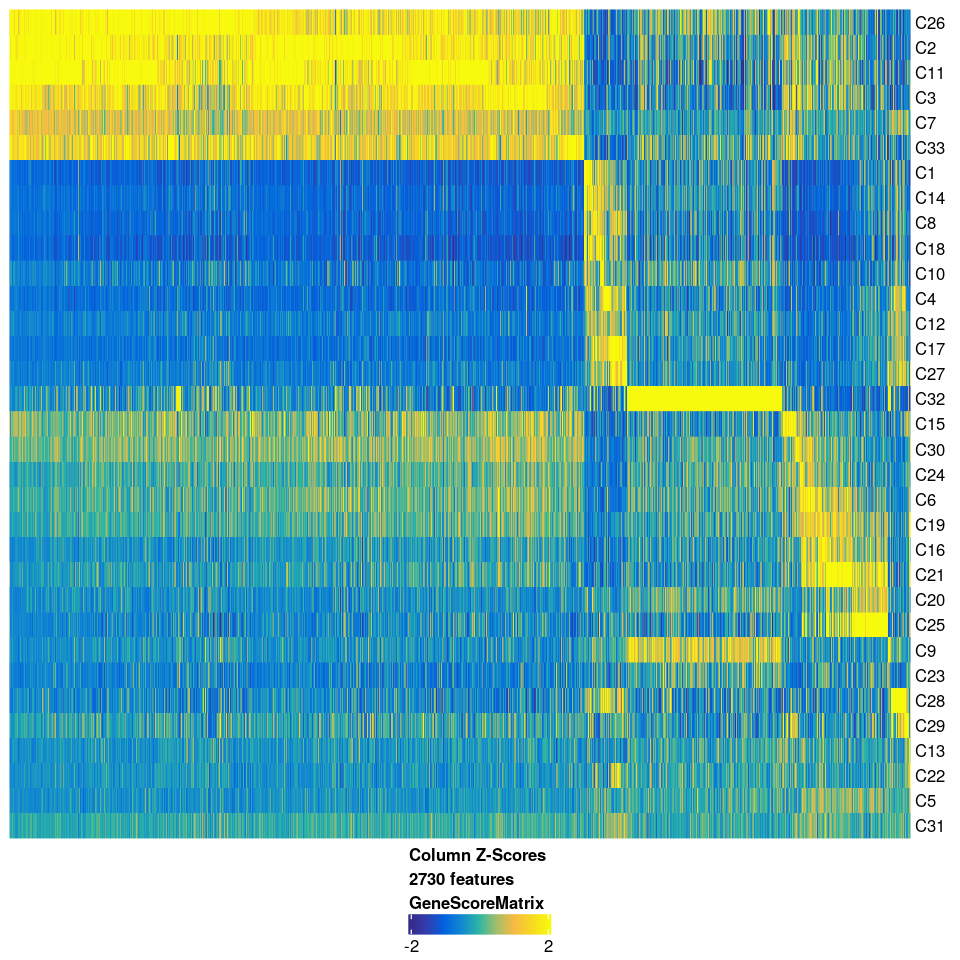

In [89]:
ComplexHeatmap::draw(heatmapGS, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [483]:
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = c("SOX2-OT"), 
    embedding = "UMAP",
    imputeWeights = getImputeWeights(proj)
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4f5f4ed7eb2c-Date-2020-05-06_Time-20-20-23.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-05-06 20:20:25 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4f5f4ed7eb2c-Date-2020-05-06_Time-20-20-23.log



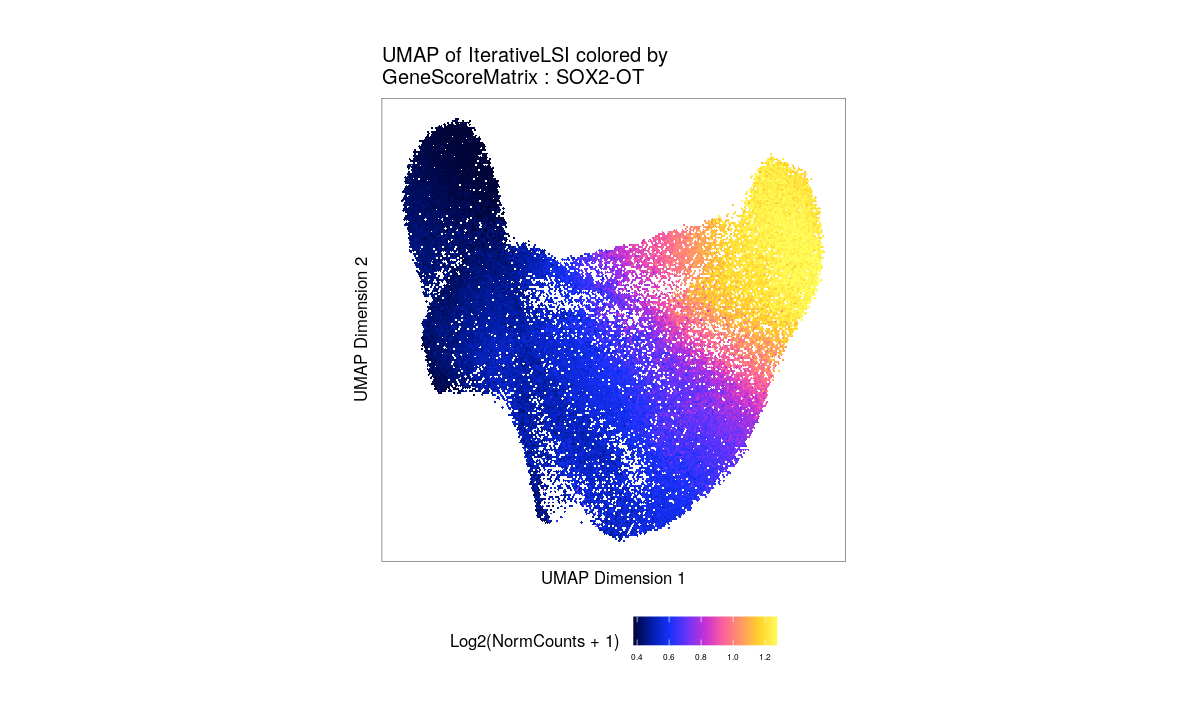

In [484]:
p

In [482]:
Q = "SOX2-OT"
assay(markersGS, "Log2FC")[which(rowData(markersGS)$name==Q),c(1,4,6,21,25)]
assay(markersGS, "FDR")[which(rowData(markersGS)$name==Q),c(1,4,6,21,25)]

,C1,C4,C6,C21,C25
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17348,-1.00495,-0.7379411,0.1238822,-0.4290408,-0.3684136


,C1,C4,C6,C21,C25
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17348,1.09935e-09,0.001217264,0.1925211,0.02644939,0.01857117


In [496]:
idr_peakset = read.table("../20200122_snapATAC/snapATAC_sessions/20200501_n76052/peaks/idr.merged.200.bed")
colnames(idr_peakset) = c("chr", "start", "end")
idr_peakset = makeGRangesFromDataFrame(idr_peakset)
idr_peakset

GRanges object with 481554 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]     chr1       51461-51661      *
       [2]     chr1       51701-52026      *
       [3]     chr1     181016-181216      *
       [4]     chr1     181286-181486      *
       [5]     chr1     196464-196674      *
       ...      ...               ...    ...
  [481550]     chrY 20587010-20587210      *
  [481551]     chrY 20925466-20925666      *
  [481552]     chrY 22744255-22744455      *
  [481553]     chrY 24270744-24270965      *
  [481554]     chrY 25399212-25399412      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [497]:
proj <- addPeakSet(proj, idr_peakset)

In [501]:
markersPeaks <- getMarkerFeatures(
    ArchRProj = proj, 
    useMatrix = "PeakMatrix", 
    groupBy = "Clusters",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-4f5f3d0d2239-Date-2020-05-08_Time-23-44-29.log
If there is an issue, please report to github with logFile!



In [499]:
proj <- addMotifAnnotations(ArchRProj = proj, motifSet = "cisbp", name = "Motif")

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-4f5f33397a0d-Date-2020-05-08_Time-23-36-43.log
If there is an issue, please report to github with logFile!

2020-05-08 23:36:44 : Gettting Motif Set, Species : Homo sapiens, 0.01 mins elapsed.

Using version 2 motifs!

2020-05-08 23:36:48 : Finding Motif Positions with motifmatchr!, 0.082 mins elapsed.

2020-05-08 23:43:51 : Creating Motif Overlap Matrix, 7.119 mins elapsed.

2020-05-08 23:43:58 : Finished Getting Motif Info!, 7.234 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-4f5f33397a0d-Date-2020-05-08_Time-23-36-43.log



In [500]:
proj <- addBgdPeaks(proj)

Identifying Background Peaks!



ERROR: Error in data.frame(rS$rowSums, 1): arguments imply differing number of rows: 0, 1


## Relation between pvalue, LFC and Gene Length

ArchR does a Wilcoxon (paired test) for each single cell in cluster matched with a background cell with similar bias. This may favour longer genes which would consistently have higher values than their background cells (assuming it is differential), versus smaller genes which may not get many reads and thus not be consistently higher than their background. 

In [434]:
df = data.frame(lfc=assay(markersGS, "Log2FC")$C25,
           fdr=assay(markersGS, "FDR")$C25)
rownames(df) = rowData(markersGS)$name

In [435]:
df = df[df$lfc>1,]
df = df[!grepl("(MIR|SNOR|LOC)", rownames(df)), ]
# df = df[df$fdr<0.1,]

In [436]:
dim(df)

[1] 341   2

In [437]:
head(df[rev(order(df$lfc)), ])

,lfc,fdr
,<dbl>,<dbl>
KRTAP9-3,3.007892,3.510867e-03
KRTAP23-1,2.701346,6.985204e-01
KRTAP3-3,2.498196,1.300342e-07
KRTAP3-2,2.442520,3.272559e-08
DLEU2L,2.409140,7.573001e-05
P2RY13,2.399159,3.047699e-05


In [438]:
glengths = data.frame(len=width(geneAnnoHg38$genes))
glengths = glengths[!is.na(geneAnnoHg38$genes$symbol),]
names(glengths) = as.vector(geneAnnoHg38$genes$symbol[!is.na(geneAnnoHg38$genes$symbol)])

In [439]:
cor(log10(glengths[rownames(df)]), -log(df$fdr), method='spearman')

[1] 0.7130838

Seems like FDR is correlated with gene length. Effectively, it would be correlated with effective length that includes the region the gene score includes.

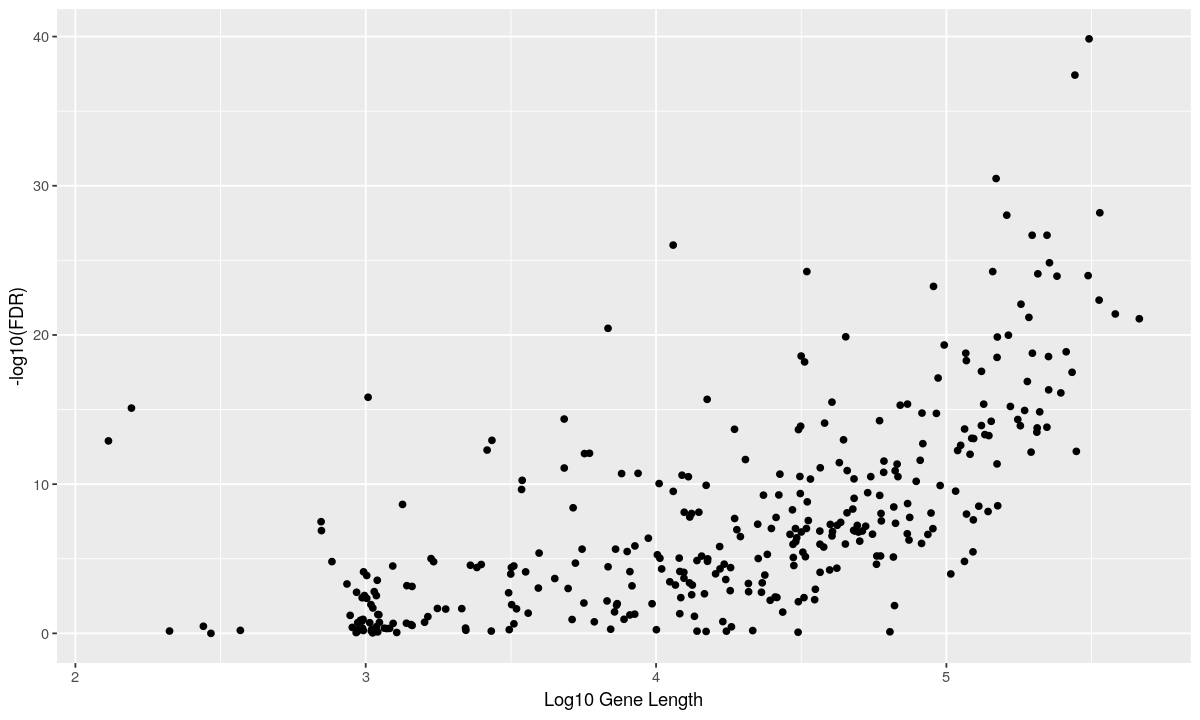

In [440]:
ggplot(data.frame(x=log10(glengths[rownames(df)]), y=-log10(df$fdr))) +
geom_point(aes(x=x,y=y)) +
xlab('Log10 Gene Length') + ylab('-log10(FDR)')

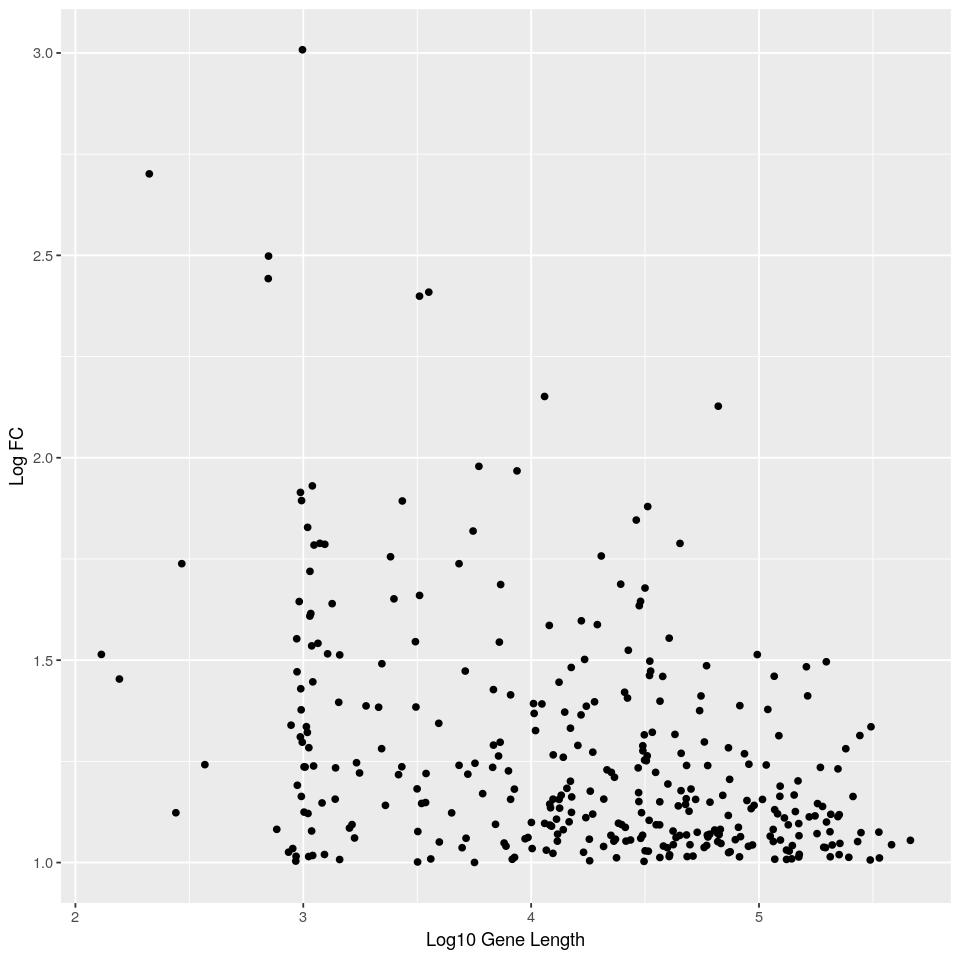

In [109]:
ggplot(data.frame(x=log10(glengths[rownames(df)]), y=df$lfc)) +
geom_point(aes(x=x,y=y)) +
xlab('Log10 Gene Length') + ylab('Log FC')

## mRNA analysis

From Cachiarelli et al 2015

In [127]:
# load bulk RNA-seq data
fpkm = read.table("/users/surag/kundajelab/scATAC-reprog/resources/GSE62777/RNAseq.FPKM.tsv", sep='\t', header=T)
fpkm$gene_id = NULL
fpkm$locus=NULL
tpm = fpkm
tpm[,2:ncol(tpm)] = 1e6*t(t(tpm[,2:ncol(tpm)])/colSums(tpm[,2:ncol(tpm)]))

# removing genes with dup names
tpm = tpm[!duplicated(tpm$gene_short_name),]
rownames(tpm) = tpm$gene_short_name
tpm$gene_short_name = NULL

tpm["GAPDH",]

,hiF.T_P14,X2dd_DOX_plus,X5dd_DOX_plus,X8dd_DOX_plus,X10dd_DOX_plus_SSEA3_pos,X14dd_DOX_plus_SSEA3_pos,X20dd_DOX_plus_TRA_plus,X24dd_TRA_pos_DOX_plus,X24dd_TRA_pos_DOX_minus,hIPSC.T_P10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,7803.64,4963.505,3908.693,3839.776,3795.548,3364.503,3032.412,3790.955,5598.224,4731.256


In [263]:
gene_set_to_plot = markerList$C25$name[1:20]
# gene_set_to_plot = names(rev(sort(table(e2g_uniq$g)[table(e2g_uniq$g)>2])))

In [264]:
colMedians(as.matrix(log2(1+tpm)[rownames(tpm) %in% gene_set_to_plot, ]))

[1] 2.851494 4.812190 5.170952 4.192456 3.686600 3.565386 2.619243 2.640943
 [9] 3.213754 3.580618

[1] 12

Warning message in melt(t(scale(t(log2(1 + tpm)[rownames(tpm) %in% gene_set_to_plot, :
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(scale(t(log2(1 + tpm)[rownames(tpm) %in% gene_set_to_plot,     ])))). In the next version, this warning will become an error.”
Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”


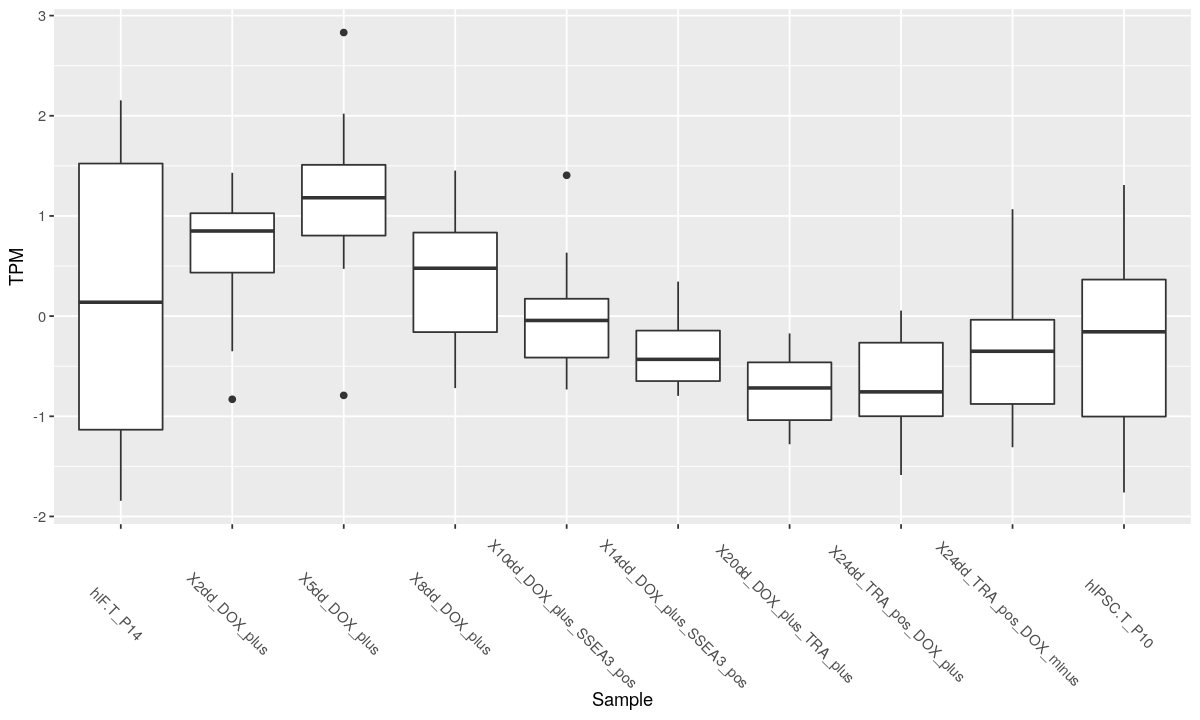

In [265]:
options(repr.plot.width = 10, repr.plot.height = 6)

sum(gene_set_to_plot %in% rownames(tpm))

# ggplot(melt(log2(1+tpm)[rownames(tpm) %in% gene_set_to_plot, ]), aes(x=variable, y=value)) +
ggplot(melt(t(scale(t(log2(1+tpm)[rownames(tpm) %in% gene_set_to_plot, ])))), aes(x=Var2, y=value)) +
stat_boxplot() +
# geom_line(aes(group=Var1),size=0.1) + geom_point() +
theme(axis.text.x = element_text(angle = -45)) +
ylab("TPM") + xlab("Sample")
# geom_boxplot(outlier.shape = NA) + geom_jitter(width = 0.2)
# coord_cartesian(ylim=c(0,8)) 

In [46]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gridExtra_2.3                     uwot_0.1.8                       
 [3] nabor_0.5.0                       Seurat_3.1.5                     
 [5] BSgenome.Hsapiens.UCSC.hg38_1.4.1 BSgenome_1.54.0                  
 [7] rtracklayer_1.46.0                Biost